# Import initial libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Dataset
 Name : Cifar-10
 
 Type : Image (RGB)
 
 Task : Multi-class(10) classification
 
 description: The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


170498071/170498071 [==============================] - 7s 0us/step


# EDA

In [4]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


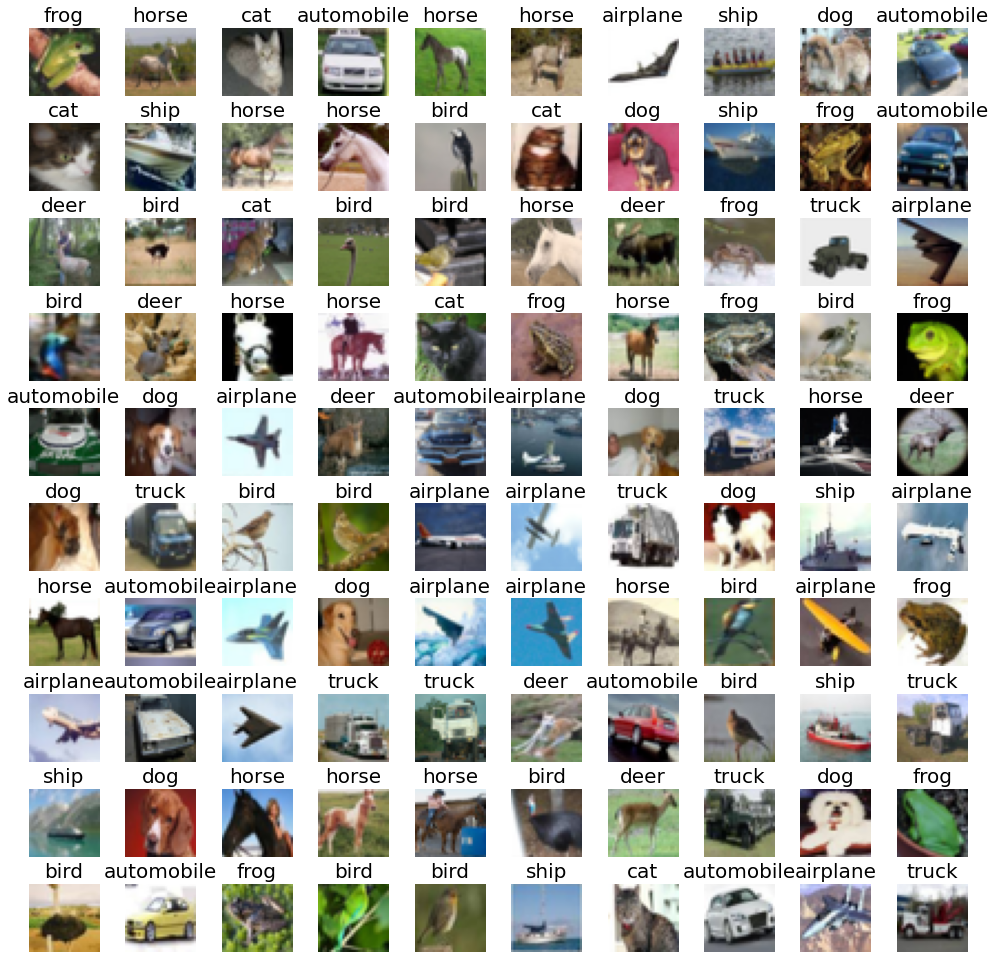

In [5]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
          'dog', 'frog', 'horse', 'ship', 'truck']
W_grid = 10
L_grid = 10


fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() 

n_train = len(X_train) 

for i in np.arange(0, W_grid * L_grid): 

    index = np.random.randint(0, n_train)
    axes[i].imshow(X_train[index,1:])
    label_index = int(y_train[index])
    axes[i].set_title(labels[label_index], fontsize = 20)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

Text(0.5, 1.0, 'Class distribution in training set')

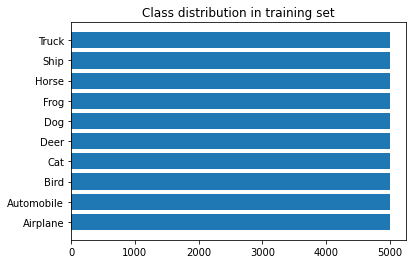

In [6]:
classes_name = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

classes, counts = np.unique(y_train, return_counts=True)
plt.barh(classes_name, counts)
plt.title('Class distribution in training set')

# Data Preprocessing

## Scaling the matrices:

In [7]:
X_train = X_train / 255
X_test = X_test / 255

## OneHotEncoding dor labels:

In [8]:
from tensorflow.keras.utils import to_categorical

In [9]:
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

# CNN Model

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# from sklearn.metrics import ConfusionMatrixDisplay
# from sklearn.metrics import classification_report, confusion_matrix

In [18]:
def plot_history(history, title):
    
    plt.figure(figsize=(15,7))
    # Plot training & validation accuracy values
    plt.subplot(121)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(122)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

In [11]:
cnn = Sequential()
cnn.add(Conv2D(64, (3,3), input_shape=(32,32,3), activation='relu'))
cnn.add(Dropout(0.2))

cnn.add(Conv2D(64, (3,3), activation='relu'))
cnn.add(Dropout(0.2))

cnn.add(Conv2D(64, (3,3), activation='relu'))
cnn.add(Dropout(0.2))

cnn.add(Flatten())
cnn.add(Dense(128, activation='relu'))
cnn.add(Dense(10, activation='softmax'))

In [12]:
METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=METRICS)


In [13]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 dropout (Dropout)           (None, 30, 30, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 dropout_1 (Dropout)         (None, 28, 28, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        36928     
                                                                 
 dropout_2 (Dropout)         (None, 26, 26, 64)        0         
                                                                 
 flatten (Flatten)           (None, 43264)             0

In [14]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [15]:
BATCH_SIZE = 32
EPOCHS = 10

model_history = cnn.fit(X_train, y_cat_train,
                          epochs = EPOCHS,
                          batch_size = BATCH_SIZE,
                          validation_data = (X_test, y_cat_test),
                          callbacks=[early_stop])

Epoch 1/10
1563/1563 [==============================] - 26s 11ms/step - loss: 1.4865 - accuracy: 0.4624 - precision: 0.6839 - recall: 0.2451 - val_loss: 1.2376 - val_accuracy: 0.5510 - val_precision: 0.7298 - val_recall: 0.3557
Epoch 2/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.0630 - accuracy: 0.6229 - precision: 0.7592 - recall: 0.4838 - val_loss: 0.9870 - val_accuracy: 0.6549 - val_precision: 0.7655 - val_recall: 0.5460
Epoch 3/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.8564 - accuracy: 0.6992 - precision: 0.7973 - recall: 0.6017 - val_loss: 0.9443 - val_accuracy: 0.6757 - val_precision: 0.7635 - val_recall: 0.5945
Epoch 4/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.7054 - accuracy: 0.7509 - precision: 0.8237 - recall: 0.6791 - val_loss: 0.9387 - val_accuracy: 0.6900 - val_precision: 0.7574 - val_recall: 0.6240
Epoch 5/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.5689 - a

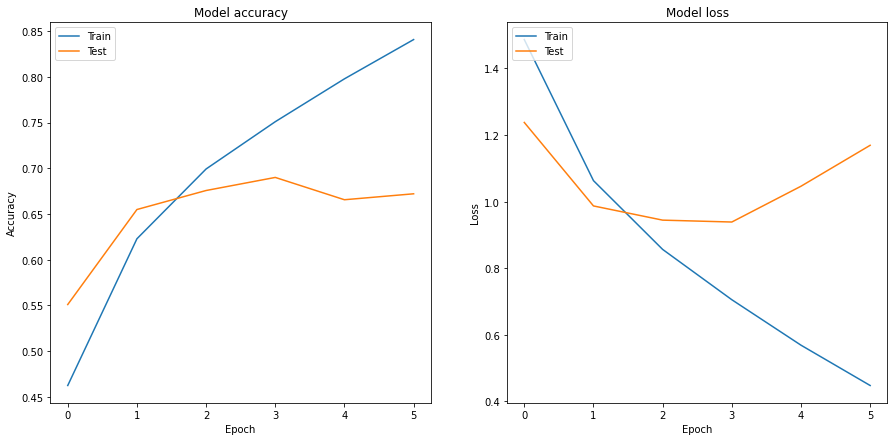

In [19]:
plot_history(model_history, 'CNN model')


# Extract miss classifications

In [25]:
predictions = cnn.predict(X_test)
predict_class = np.argmax(predictions, axis=1)
predict_class = predict_class.tolist()
predict_class = np.array(predict_class)
print(predict_class)
y_test = y_test.reshape(1, -1)[0]
print(y_test)

313/313 [==============================] - 1s 3ms/step
[3 8 8 ... 5 4 7]
[3 8 8 ... 5 1 7]


In [28]:
miss_x = []
miss_y = []
for i in range(y_test.shape[0]):
  if y_test[i] != predict_class[i]:
    miss_x.append(X_test[i])
    miss_y.append((y_test[i], predict_class[i]))

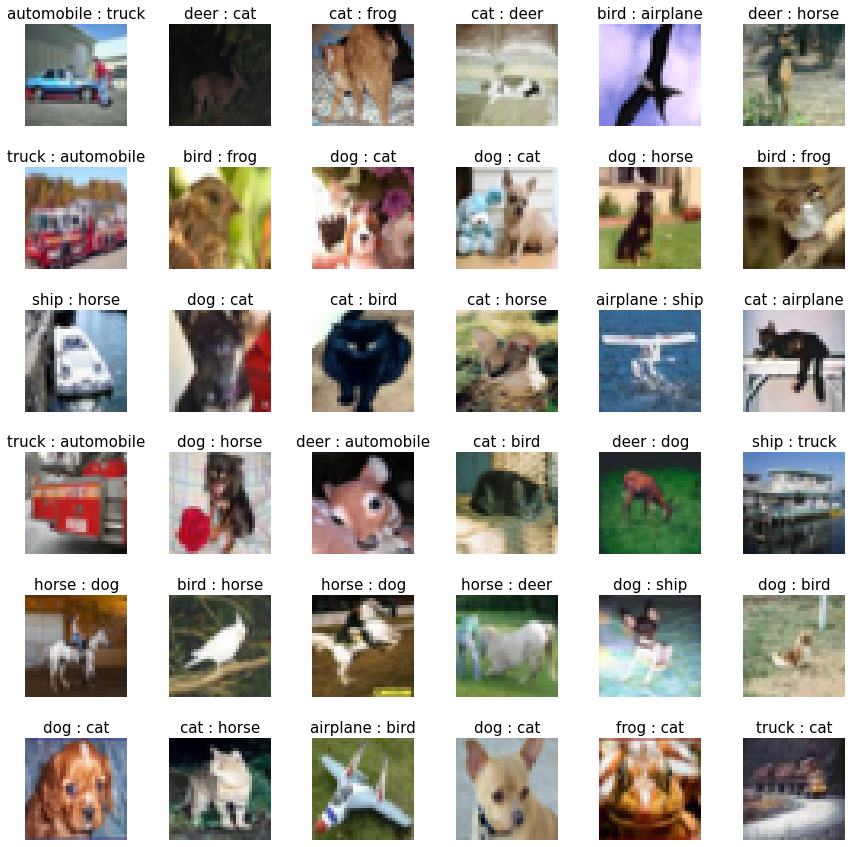

In [39]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
          'dog', 'frog', 'horse', 'ship', 'truck']
W_grid = 6
L_grid = 6


fig, axes = plt.subplots(L_grid, W_grid, figsize = (15,15))

axes = axes.ravel() 

n_train = len(miss_y) 

for i in np.arange(0, W_grid * L_grid): 

    index = np.random.randint(0, n_train)
    axes[i].imshow(miss_x[index])
    axes[i].set_title(f"{labels[miss_y[index][0]]} : {labels[miss_y[index][1]]}", fontsize = 15)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

number of miss classifications per class:

In [44]:
miss_count_per_class = {label:0 for label in labels}
for miss in miss_y:
  miss_count_per_class[labels[miss[0]]] += 1

print (miss_count_per_class)

{'airplane': 324, 'automobile': 138, 'bird': 448, 'cat': 506, 'deer': 458, 'dog': 387, 'frog': 238, 'horse': 253, 'ship': 198, 'truck': 329}
